In [7]:
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
df=pd.read_csv('dataFinals.csv')
df.head()

,Unnamed: 0,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,...,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,1,I. Sarr,22,78,87,Watford,185.0,76.0,Right,79,...,9,1844,408,1,94,77,68,81,22,66
1,2,Cristiano,33,72,72,Kashiwa Reysol,183.0,83.0,Right,73,...,8,1933,416,1,75,73,69,70,48,81
2,4,V. Grifo,27,78,78,SC Freiburg,180.0,77.0,Right,78,...,14,1942,405,1,70,74,77,81,41,62
3,5,Cristiano Ronaldo,35,92,92,Juventus,188.0,83.0,Right,92,...,11,2221,464,5,89,93,81,89,35,77
4,7,L. Waldschmidt,24,76,83,SL Benfica,180.0,74.0,Left,77,...,16,1866,388,1,74,79,69,75,29,62


In [52]:
df['Value'].value_counts()

1.60      142
1.90      125
1.30      121
1.40      119
1.20      115
         ... 
97.50       1
72.50       1
185.50      1
66.50       1
0.13        1
Name: Value, Length: 233, dtype: int64

In [53]:
df.isna().sum()

Unnamed: 0    0
Name          0
Age           0
Overall       0
Potential     0
             ..
SHO           0
PAS           0
DRI           0
DEF           0
PHY           0
Length: 65, dtype: int64

## Player who are under 22 age
- young player especially under 22 age is concern to be a next superstar on football
- based on espn pundits say that some young footballers have some preassure when they arrive with big price
- carrick says that "Carrick admits he has sympathy with the young players who have arrived at United with big price tags and then struggled to make an instant impression"

In [54]:
df_GoldenBoys=df[df['Age']<22]

In [55]:
df_GoldenBoys.head()

,Unnamed: 0,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,...,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
5,8,20 O. Valakari,19,64,77,Tromsø IL,188.0,82.0,Left,65,...,6,1626,356,1,62,61,62,57,47,67
6,11,T. Alexander-Arnold,21,87,92,Liverpool,180.0,69.0,Right,87,...,7,2220,464,2,80,66,87,80,80,71
7,12,João Félix,20,82,93,Atlético Madrid,180.0,70.0,Right,84,...,14,2069,432,1,81,81,76,85,40,69
8,13,E. Haaland,19,84,92,Borussia Dortmund,193.0,88.0,Left,85,...,7,2031,439,2,85,87,63,76,43,85
9,14,J. Frimpong,19,71,86,Celtic,175.0,70.0,Right,72,...,14,1859,410,1,90,49,64,77,62,68


## Dropping features unnamed: 0

In [60]:
df_GoldenBoys.drop("Unnamed: 0",axis=1,inplace=True)

In [61]:
df_GoldenBoys.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Team', 'Height', 'Weight',
       'Foot', 'Best_Overall', 'Position', 'Growth', 'Value', 'Wage',
       'Release_Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control', 'Movement',
       'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing_Tackle',
       'Sliding_Tackle', 'Goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_Stats',
       'Base_Stats', 'Int_Reputation', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY'],
      dtype='object')

## Checking the Data for NaN value

In [62]:
df_GoldenBoys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 5 to 5291
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1585 non-null   object 
 1   Age               1585 non-null   int64  
 2   Overall           1585 non-null   int64  
 3   Potential         1585 non-null   int64  
 4   Team              1585 non-null   object 
 5   Height            1585 non-null   float64
 6   Weight            1585 non-null   float64
 7   Foot              1585 non-null   object 
 8   Best_Overall      1585 non-null   int64  
 9   Position          1585 non-null   object 
 10  Growth            1585 non-null   int64  
 11  Value             1585 non-null   float64
 12  Wage              1585 non-null   float64
 13  Release_Clause    1585 non-null   float64
 14  Attacking         1585 non-null   int64  
 15  Crossing          1585 non-null   int64  
 16  Finishing         1585 non-null   int64  


- there is no missing value in it

In [63]:
df_GoldenBoys.describe()

,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,...,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
count,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,...,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,19.485174,64.439748,77.889590,180.107256,72.673186,65.986751,13.449842,3.317893,0.006798,6.098909,...,13.355205,1579.143849,348.514196,1.010726,70.647319,52.352681,56.317350,63.690221,45.844164,59.662461
std,1.323329,5.933687,4.654725,6.906014,6.705319,5.901802,4.177128,9.328396,0.012677,18.471622,...,13.421748,222.080616,35.022755,0.134881,9.095032,12.649506,8.987062,9.076516,16.632437,9.241650
min,16.000000,47.000000,57.000000,160.000000,53.000000,47.000000,0.000000,0.100000,0.000500,0.000000,...,5.000000,770.000000,239.000000,1.000000,33.000000,22.000000,27.000000,30.000000,15.000000,31.000000
25%,19.000000,60.000000,75.000000,175.000000,68.000000,62.000000,11.000000,0.680000,0.001000,1.000000,...,8.000000,1484.000000,325.000000,1.000000,65.000000,43.000000,50.000000,59.000000,30.000000,54.000000
50%,20.000000,64.000000,78.000000,180.000000,72.000000,66.000000,13.000000,1.400000,0.003000,2.300000,...,10.000000,1594.000000,346.000000,1.000000,71.000000,55.000000,57.000000,65.000000,48.000000,60.000000
75%,21.000000,68.000000,81.000000,185.000000,77.000000,69.000000,16.000000,2.600000,0.007000,4.800000,...,13.000000,1715.000000,370.000000,1.000000,77.000000,62.000000,62.000000,70.000000,60.000000,66.000000
max,21.000000,90.000000,95.000000,206.000000,100.000000,91.000000,26.000000,185.500000,0.160000,357.100000,...,89.000000,2220.000000,470.000000,3.000000,96.000000,87.000000,87.000000,91.000000,85.000000,85.000000


### feature description
feature description overall get from this link https://www.fifplay.com/encyclopedia/player-attributes/
- Name : Name of player 
- Overall : overall rating player
- Potential : determines how fast their attributes should grow and when they should stop
- Height : Height player base on cm
- weight : weight player base on kg
- Growth : potential growth overall for player
- Value : value of the player
- Wage : wage of the player
- Release Clause : release clause of the player
- these features below are what affect the overall size. the features below cover the curently overall from the player. these features below starting from the attacking aspect, defensive aspect, midfield aspect, goalkeeping aspect.
    - Attacking : range between 0-500
    - Crossing : range between 1-100
    - Finishing : range between 1-100
    - Heading_Accuracy : range between 1-100
    - Short_Passing : range between 1-100
    - Volleys : range between 1-100
    - skill :
    - Dribbling : range between 1-100
    - Curve : range between 1-100
    - FK_Accuracy : range between 1-100
    - Long_Passing : range between 1-100
    - Ball_Control : range between 1-100
    - Movement : range between 0-500
    - Acceleration : range between 1-100
    - Sprint_Speed : range between 1-100
    - Agility : range between 1-100
    - Reactions : range between 1-100
    - Balance : range between 1-100
    - Power : range between 0-500
    - Shot_Power : range between 1-100
    - Jumping : range between 1-100
    - Stamina : range between 1-100
    - Strength : range between 1-100
    - Long_Shots : range between 1-100
    - Aggression : range between 1-100
    - Interceptions : range between 1-100
    - Positioning : range between 1-100
    - Vision : range between 1-100
    - Penalties	: range between 1-100
    - Composure : range between 1-100
    - Defending : range between 1-100
    - Marking : range between 1-100
    - Standing_Tackle : range between 1-100
    - Sliding_Tackle : range between 1-100
    - Goalkeeping : range between 1-100
    - GK_Diving : range between 1-100
    - GK_Handling : range between 1-100
    - GK_Kicking : range between 1-100
    - GK_Positioning : range between 1-100
    - GK_Reflexes : range between 1-100
- Total_Stats : total stats on how much each games
- Base_Stats : Base stats equals sort of averaged (based on how much each in game stats contributes to the overall rating for that stat)
- Int_Reputation :Players with one or two-star international reputations do not get boosts to their ratings, but three-star players will receive +1 overall if they are already rated 51 or higher. At four-stars, this becomes +1 between 36 and 66 overall and +2 for 67-99. Five-star players get boosts of +1 for 24-49, +2 for 50-74 and +3 for 75-99. Van Dijk's four-star international reputation adds +2 onto his existing 88 score to give him 90 overall, which is the score on his card in FIFA Ultimate Team.
- PAC : Pace (PAC) is a Player Attribute in FIFA that determines a player's speed in walking and running.
- SHO : Shooting (SHO) is a Player Attribute in FIFA that determines a player's general shooting strength and accuracy.
- PAS : Passing (PAS) is a Player Attribute in FIFA that determines how accurate a player passes the ball to a teammate.
- DRI : Dribbling (DRI) is a Player Attribute in FIFA that determines a player's ability to carry the ball and past an opponent while being in control.

In [70]:
df_GoldenBoys.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Team', 'Height', 'Weight',
       'Foot', 'Best_Overall', 'Position', 'Growth', 'Value', 'Wage',
       'Release_Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control', 'Movement',
       'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing_Tackle',
       'Sliding_Tackle', 'Goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_Stats',
       'Base_Stats', 'Int_Reputation', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY'],
      dtype='object')

In [71]:
df_GoldenBoys.describe()

,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,...,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
count,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,...,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,19.485174,64.439748,77.889590,180.107256,72.673186,65.986751,13.449842,3.317893,0.006798,6.098909,...,13.355205,1579.143849,348.514196,1.010726,70.647319,52.352681,56.317350,63.690221,45.844164,59.662461
std,1.323329,5.933687,4.654725,6.906014,6.705319,5.901802,4.177128,9.328396,0.012677,18.471622,...,13.421748,222.080616,35.022755,0.134881,9.095032,12.649506,8.987062,9.076516,16.632437,9.241650
min,16.000000,47.000000,57.000000,160.000000,53.000000,47.000000,0.000000,0.100000,0.000500,0.000000,...,5.000000,770.000000,239.000000,1.000000,33.000000,22.000000,27.000000,30.000000,15.000000,31.000000
25%,19.000000,60.000000,75.000000,175.000000,68.000000,62.000000,11.000000,0.680000,0.001000,1.000000,...,8.000000,1484.000000,325.000000,1.000000,65.000000,43.000000,50.000000,59.000000,30.000000,54.000000
50%,20.000000,64.000000,78.000000,180.000000,72.000000,66.000000,13.000000,1.400000,0.003000,2.300000,...,10.000000,1594.000000,346.000000,1.000000,71.000000,55.000000,57.000000,65.000000,48.000000,60.000000
75%,21.000000,68.000000,81.000000,185.000000,77.000000,69.000000,16.000000,2.600000,0.007000,4.800000,...,13.000000,1715.000000,370.000000,1.000000,77.000000,62.000000,62.000000,70.000000,60.000000,66.000000
max,21.000000,90.000000,95.000000,206.000000,100.000000,91.000000,26.000000,185.500000,0.160000,357.100000,...,89.000000,2220.000000,470.000000,3.000000,96.000000,87.000000,87.000000,91.000000,85.000000,85.000000


In [73]:
df_GoldenBoys.describe(include='object')

,Name,Team,Foot,Position
count,1585,1585,1585,1585
unique,1579,504,2,15
top,J. Reid,Ajax,Right,CAM
freq,2,14,1165,348


In [84]:
for column_desc in df_GoldenBoys:
    print(df_GoldenBoys[column_desc].describe())

count        1585
unique       1579
top       J. Reid
freq            2
Name: Name, dtype: object
count    1585.000000
mean       19.485174
std         1.323329
min        16.000000
25%        19.000000
50%        20.000000
75%        21.000000
max        21.000000
Name: Age, dtype: float64
count    1585.000000
mean       64.439748
std         5.933687
min        47.000000
25%        60.000000
50%        64.000000
75%        68.000000
max        90.000000
Name: Overall, dtype: float64
count    1585.000000
mean       77.889590
std         4.654725
min        57.000000
25%        75.000000
50%        78.000000
75%        81.000000
max        95.000000
Name: Potential, dtype: float64
count     1585
unique     504
top       Ajax
freq        14
Name: Team, dtype: object
count    1585.000000
mean      180.107256
std         6.906014
min       160.000000
25%       175.000000
50%       180.000000
75%       185.000000
max       206.000000
Name: Height, dtype: float64
count    1585.000000
mean  

## Checking each column

In [91]:
df_GoldenBoys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 5 to 5291
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1585 non-null   object 
 1   Age               1585 non-null   int64  
 2   Overall           1585 non-null   int64  
 3   Potential         1585 non-null   int64  
 4   Team              1585 non-null   object 
 5   Height            1585 non-null   float64
 6   Weight            1585 non-null   float64
 7   Foot              1585 non-null   object 
 8   Best_Overall      1585 non-null   int64  
 9   Position          1585 non-null   object 
 10  Growth            1585 non-null   int64  
 11  Value             1585 non-null   float64
 12  Wage              1585 non-null   float64
 13  Release_Clause    1585 non-null   float64
 14  Attacking         1585 non-null   int64  
 15  Crossing          1585 non-null   int64  
 16  Finishing         1585 non-null   int64  


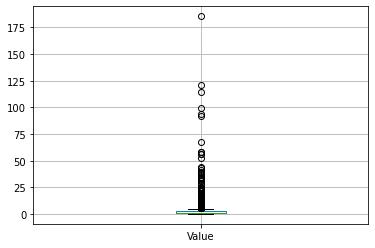

In [125]:
df_GoldenBoys.boxplot(['Value'])

In [126]:
df_GoldenBoys[df_GoldenBoys['Value']==0]

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,...,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY


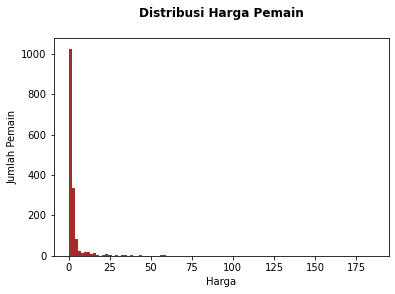

In [142]:
plt.hist(df_GoldenBoys['Value'],bins=100,color='brown')
plt.title("Distribusi Harga Pemain",fontdict={
    'fontweight':'bold',
    'color':'black',
    'verticalalignment':'baseline',
    'horizontalalignment':'center'
},y=1.07)
plt.ylabel("Jumlah Pemain")
plt.xlabel("Harga")
plt.show()

In [143]:
df_GoldenBoys.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Team', 'Height', 'Weight',
       'Foot', 'Best_Overall', 'Position', 'Growth', 'Value', 'Wage',
       'Release_Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control', 'Movement',
       'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing_Tackle',
       'Sliding_Tackle', 'Goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_Stats',
       'Base_Stats', 'Int_Reputation', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY'],
      dtype='object')